In [1]:
import requests
import pandas as pd
import numpy as np
import fnmatch
import re
from string import Template
import matplotlib.pyplot as plt 
import seaborn as sns

For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.





In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
params = {'query_text': 'fire','year': 2016}
response = requests.get(endpoint, params = params)
response.text
res = response.json()

#### Questions  
1. Make an API request that returns the months where "fire" was searched in 2016.

In [3]:
df_fire = pd.DataFrame(res)
df_fire

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


Which month had the most searches?  

In [4]:
mostsearches = df_fire.loc[df_fire["query_count"] ==df_fire["query_count"].max()]
mostsearches

,month_name,year,query_count,query_text
7,August,2016,47,fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [5]:
endpointtm = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=48000'
responsetm = requests.get(endpointtm)
restm = responsetm.json()
queryhundred = pd.DataFrame(restm)
queryhundred['query_text'].dtypes

dtype('O')

In [6]:
hundredquery = queryhundred
hundredquery['query_count'] = pd.to_numeric(hundredquery['query_count'])
hundredquery

,month_name,year,query_count,query_text,month
0,January,2014,223.0,ebid,NaN
1,January,2014,112.0,property maps,NaN
2,January,2014,97.0,maps,NaN
3,January,2014,90.0,property tax,NaN
4,January,2014,76.0,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8.0,sign ordinance,7
43673,July,2021,8.0,snap,7
43674,July,2021,8.0,small business,7
43675,July,2021,8.0,water department,7


In [7]:
hundredquery = queryhundred
hundredquery['query_count'] = pd.to_numeric(hundredquery['query_count'])
hundredquery

,month_name,year,query_count,query_text,month
0,January,2014,223.0,ebid,NaN
1,January,2014,112.0,property maps,NaN
2,January,2014,97.0,maps,NaN
3,January,2014,90.0,property tax,NaN
4,January,2014,76.0,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8.0,sign ordinance,7
43673,July,2021,8.0,snap,7
43674,July,2021,8.0,small business,7
43675,July,2021,8.0,water department,7


In [8]:
def queryover100 (query_count):
    if query_count > 100 :
        return 'True'
    else:
        return 'False'  
hundredquery['queryover100'] = hundredquery['query_count'].apply(queryover100)
hundredquery

,month_name,year,query_count,query_text,month,queryover100
0,January,2014,223.0,ebid,NaN,True
1,January,2014,112.0,property maps,NaN,True
2,January,2014,97.0,maps,NaN,False
3,January,2014,90.0,property tax,NaN,False
4,January,2014,76.0,jobs,NaN,False
...,...,...,...,...,...,...
43672,July,2021,8.0,sign ordinance,7,False
43673,July,2021,8.0,snap,7,False
43674,July,2021,8.0,small business,7,False
43675,July,2021,8.0,water department,7,False


In [9]:
onehundredqueries = hundredquery.loc[hundredquery['queryover100'] =='True']
print('Queries over 100 Occurred:'+' '+str(len(onehundredqueries))+' times')

Queries over 100 Occurred: 1262 times


3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [10]:
endpointtom = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=select * where UPPER(query_text) like "%CODES%" and query_count >100'
response = requests.get(endpointtom)
restom = response.json()
print('ANSWER #3:'+' '+str(len(restom))+' times')

ANSWER #3: 58 times


4. Make an API request that returns the entire Top 500 Monthly Searches dataset.

In [11]:
endpointall = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=48000'
response = requests.get(endpointall)
resall = response.json()
dataall = pd.DataFrame(resall)
dataall

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [12]:
MAPALL = dataall.loc[dataall['query_text'].str.upper() =="MAPS"]
ALLMAPS = pd.DataFrame(MAPALL)
def month_num(month_name):
    if month_name == 'January':
        return 1
    elif month_name == 'February':
        return 2
    elif month_name == 'March':
        return 3
    elif month_name == 'April':
        return 4
    elif month_name == 'May':
        return 5
    elif month_name == 'June':
        return 6
    elif month_name == 'July':
        return 7
    elif month_name == 'August':
        return 8
    elif month_name == 'September':
        return 9
    elif month_name == 'October':
        return 10
    elif month_name == 'November':
        return 11
    elif month_name == 'December':
        return 12
    else:
        return 0

def month_numchar(month_name):
    if month_name == 'January':
        return '01'
    elif month_name == 'February':
        return '02'
    elif month_name == 'March':
        return '03'
    elif month_name == 'April':
        return '04'
    elif month_name == 'May':
        return '05'
    elif month_name == 'June':
        return '06'
    elif month_name == 'July':
        return '07'
    elif month_name == 'August':
        return '08'
    elif month_name == 'September':
        return '09'
    elif month_name == 'October':
        return '10'
    elif month_name == 'November':
        return '11'
    elif month_name == 'December':
        return '12'
    else:
        return '0'
ALLMAPS['month_num'] = ALLMAPS['month_name'].apply(month_num)
ALLMAPS['month_numchar'] = ALLMAPS['month_name'].apply(month_numchar)
ALLMAPS['query_count'] = pd.to_numeric(ALLMAPS['query_count'])
ALLMAPS

,month_name,year,query_count,query_text,month,month_num,month_numchar
2,January,2014,97,maps,NaN,1,01
128,January,2014,12,Maps,NaN,1,01
503,February,2014,140,maps,NaN,2,02
1005,March,2014,144,maps,NaN,3,03
1503,April,2014,152,maps,NaN,4,04
...,...,...,...,...,...,...,...
41188,March,2021,132,maps,3,3,03
41683,April,2021,148,maps,4,4,04
42181,May,2021,129,Maps,5,5,05
42682,June,2021,151,maps,6,6,06


Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

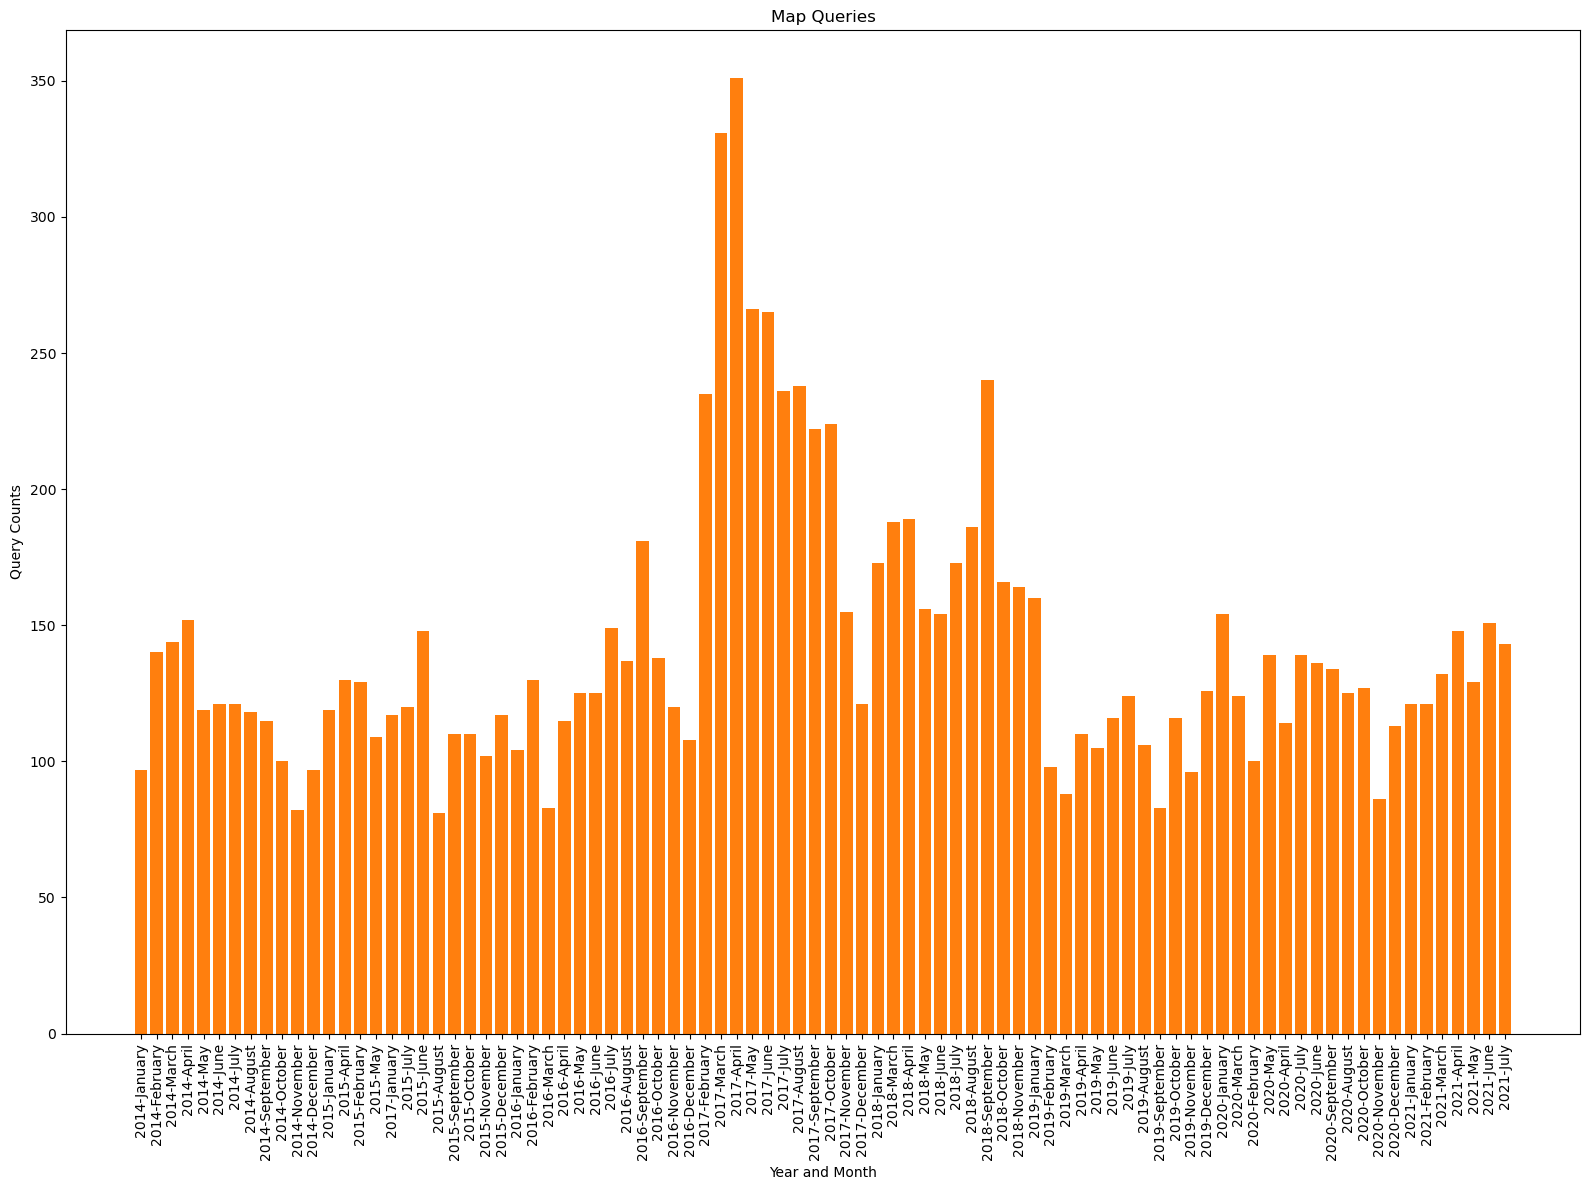

In [13]:
plt.figure(figsize=(16,12))
for index, row in ALLMAPS.iterrows():
    x = ALLMAPS["year"]+'-('+ ALLMAPS["month_numchar"]+')-'+ ALLMAPS["month_name"]
    y = ALLMAPS['query_count']
    plt.bar(ALLMAPS["year"]+'-'+ALLMAPS["month_name"],ALLMAPS['query_count'])
plt.xlabel('Year and Month')
plt.ylabel('Query Counts')
plt.title('Map Queries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()